In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist

In [ ]:
# Dataset used: https://www.kaggle.com/datasets/hojjatk/mnist-dataset?resource=download

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(y_train) #labels range from 0-9

[5 0 4 ... 5 6 8]


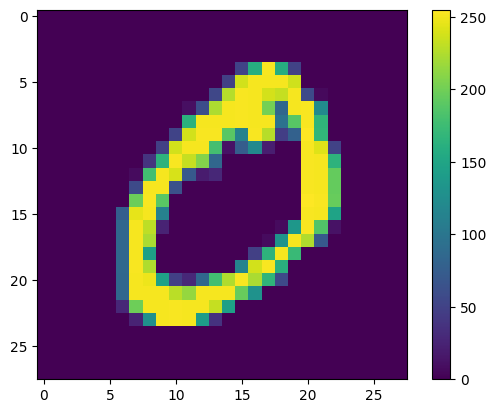

In [ ]:
plt.figure() #for visualising
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
#normalizing the training data because normally images pixels range from 0-255, CNN model performs better with range 0-1
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

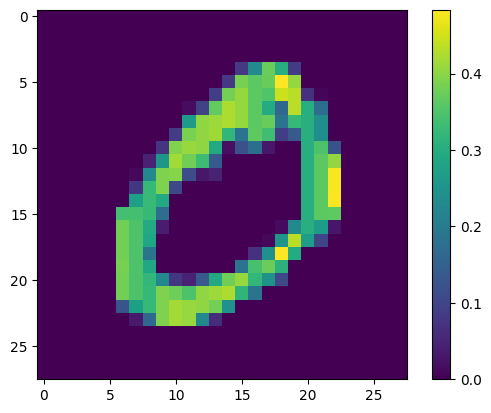

In [ ]:
plt.figure() #for visualising
plt.imshow(x_train[1])
plt.colorbar()

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #input_size of the image is 28x28 and 1 means grayscale.
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) # 10 neurons for 10 classes

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(x_train, y_train,epochs=1)

1875/1875 [==============================] - 11s 3ms/step - loss: 0.1436 - accuracy: 0.9563


## Accuracy of the Model

In [ ]:
loss,accuracy = model.evaluate(x_test, y_test)
print("Loss =",loss)
print("Accuracy =",accuracy)

313/313 [==============================] - 1s 4ms/step - loss: 0.0487 - accuracy: 0.9846
Loss = 0.04868948832154274
Accuracy = 0.9846000075340271


In [ ]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred0 = model.predict(x_test)
y_pred = np.argmax(y_pred0,axis = 1)

313/313 [==============================] - 1s 2ms/step


(<Figure size 800x800 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

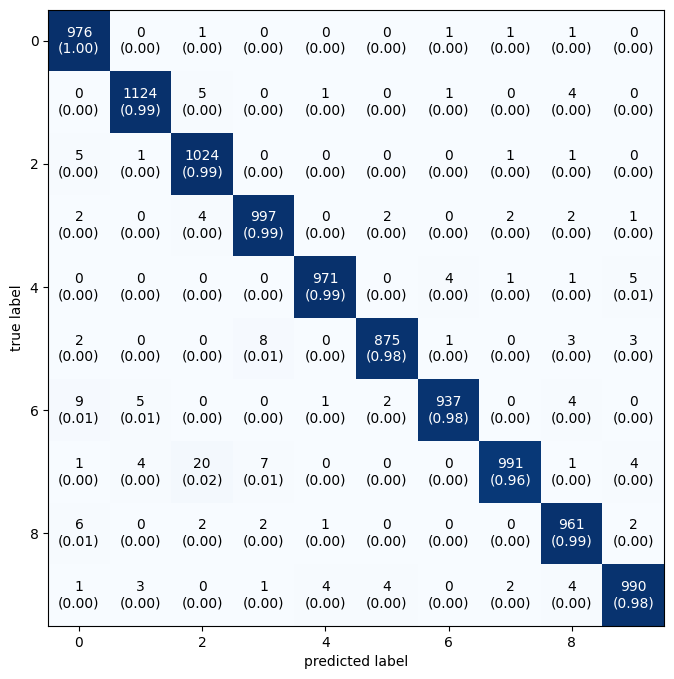

In [ ]:
mat = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(conf_mat=mat,figsize=(8,8), show_normed = True)

# **Using the Test data to predict**




In [ ]:
# Make a prediction on a single test image
prediction = model.predict(x_test[[4]])  # Predict class probabilities for the first test image

# Get the predicted class by finding the index of the highest probability
predicted_digit = np.argmax(prediction[0])

confidence = prediction[0][predicted_digit] * 100

1/1 [==============================] - 0s 30ms/step


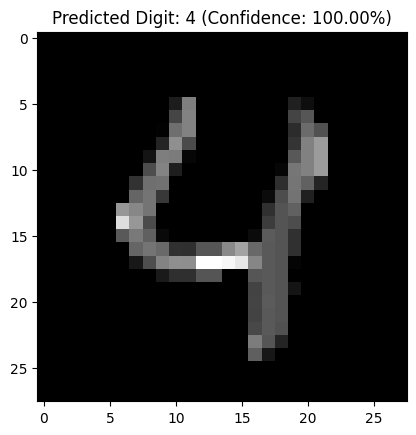

In [ ]:
# Display the test image and predicted digit
plt.imshow(x_test[4].reshape(28, 28), cmap='gray')
title_text = f"Predicted Digit: {predicted_digit} (Confidence: {confidence:.2f}%)"
plt.title(title_text)
plt.show()

### HandDrawn images for testing the model

In [37]:
def predict_image(image_path):
  image = cv2.imread(image_path)

  # Convert the image to grayscale
  img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # BGR for OpenCV

  # Resize the grayscale image​
  img_resized= cv2.resize(img_gray, (28, 28))

  # inversing the black and white pixels
  ret,thresh2 = cv2.threshold(img_resized,127,255,cv2.THRESH_BINARY_INV)


  # Reshape the image for prediction (single row, 28x28 columns, grayscale)
  img = thresh2.reshape(1, 28, 28, 1)

  # Normalize the pixel values (optional)
  img = img / 255.0  # Normalize between 0 and 1

  # Make prediction
  prediction = model.predict(img)
  predicted_digit = np.argmax(prediction)
  confidence = prediction[0][predicted_digit] * 100  # Convert to percentage

  plt.imshow(img_resized.reshape(28, 28), cmap='gray')
  title_text = f"Predicted Digit: {predicted_digit} (Confidence: {confidence:.2f}%)"
  plt.title(title_text)
  plt.show()

  return predicted_digit, confidence

1/1 [==============================] - 0s 19ms/step


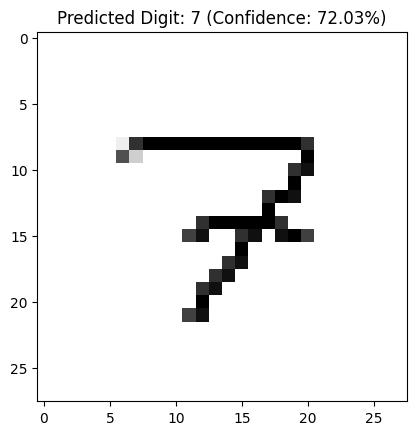

In [38]:
test_image ="/content/digit1.png"
predicted_digit, confidence = predict_image(test_image)

1/1 [==============================] - 0s 125ms/step


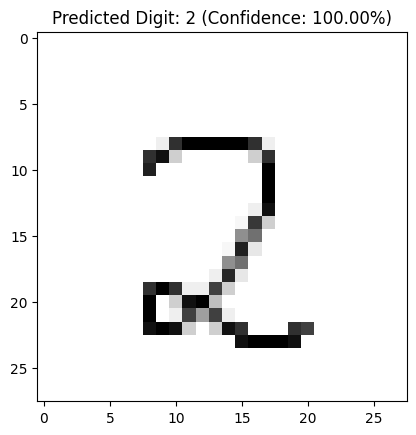

In [40]:
test_image ="/content/digit2.png"
predicted_digit, confidence = predict_image(test_image)